In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from geopy.distance import geodesic

In [38]:
data = pd.read_csv('accident_semi_cleaned.csv')

In [94]:
data.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,...,trunk_road_flag,lsoa_of_accident_location,week_number,year,month,day,hour,minute,weekend,morning
0,519490.0,203300.0,-0.271752,51.715661,Metropolitan Police,Slight,1.0,1.0,Saturday,Hertsmere,...,Trunk (Roads managed by Highways England),E01023583,51,1999,12,25,9,30,1,1
1,521740.0,201070.0,-0.239977,51.695136,Metropolitan Police,Slight,2.0,1.0,Friday,Hertsmere,...,Trunk (Roads managed by Highways England),E01023584,50,1999,12,17,18,38,0,0
2,519610.0,203240.0,-0.270037,51.715096,Metropolitan Police,Slight,2.0,2.0,Wednesday,Hertsmere,...,Trunk (Roads managed by Highways England),E01023583,50,1999,12,15,18,4,0,0
3,520090.0,202830.0,-0.263233,51.711309,Metropolitan Police,Serious,2.0,1.0,Thursday,Hertsmere,...,Trunk (Roads managed by Highways England),E01023583,48,1999,12,2,4,10,0,1
4,522640.0,200320.0,-0.227225,51.688200,Metropolitan Police,Slight,3.0,2.0,Saturday,Hertsmere,...,Trunk (Roads managed by Highways England),E01023584,48,1999,12,4,9,51,1,1


In [85]:
hospitals = pd.read_csv('Hospital.csv')

In [86]:
hospitals.head()

,OrganisationID,OrganisationCode,OrganisationType,SubType,Sector,OrganisationStatus,IsPimsManaged,OrganisationName,Address1,Address2,...,County,Postcode,Latitude,Longitude,ParentODSCode,ParentName,Phone,Email,Website,"Fax,,,"
0,17970,NDA07,Hospital,Hospital,Independent Sector,Visible,True,Walton Community Hospital - Virgin Care Servic...,NaN,Rodney Road,...,Surrey,KT12 3LD,51.379997,-0.406042,NDA,Virgin Care Services Ltd,01932 414205,NaN,NaN,"01932 253674,,,"
1,17981,NDA18,Hospital,Hospital,Independent Sector,Visible,True,Woking Community Hospital (Virgin Care),NaN,Heathside Road,...,Surrey,GU22 7HS,51.315132,-0.556289,NDA,Virgin Care Services Ltd,01483 715911,NaN,NaN,",,,"
2,18102,NLT02,Hospital,Hospital,NHS Sector,Visible,True,North Somerset Community Hospital,North Somerset Community Hospital,Old Street,...,Avon,BS21 6BS,51.437195,-2.847193,NLT,North Somerset Community Partnership Community...,01275 872212,NaN,http://www.nscphealth.co.uk,",,,"
3,18138,NMP01,Hospital,Hospital,Independent Sector,Visible,False,Bridgewater Hospital,120 Princess Road,NaN,...,Greater Manchester,M15 5AT,53.459743,-2.245469,NMP,Bridgewater Hospital (Manchester) Ltd,0161 2270000,NaN,www.bridgewaterhospital.com,",,,"
4,18142,NMV01,Hospital,Hospital,Independent Sector,Visible,True,Kneesworth House,Old North Road,Bassingbourn,...,NaN,SG8 5JP,52.078121,-0.030604,NMV,Partnerships In Care Ltd,01763 255 700,reception_kneesworthhouse@partnershipsincare.c...,www.partnershipsincare.co.uk,",,,"


In [87]:
hospitals.shape

(1211, 22)

In [88]:
#get missing values in hospitals data
hospitals.isnull().sum()


OrganisationID           0
OrganisationCode         0
OrganisationType         0
SubType                  0
Sector                   0
OrganisationStatus       0
IsPimsManaged            0
OrganisationName         0
Address1               328
Address2               484
Address3              1064
City                    15
County                 238
Postcode                 1
Latitude                 2
Longitude                2
ParentODSCode            0
ParentName               0
Phone                  250
Email                  789
Website                358
Fax,,,                   2
dtype: int64

In [91]:
#drop all columns with missing values in longitude and latitude columns
hospitals.dropna(subset=['Longitude','Latitude'],inplace=True)

In [92]:
hospitals.shape

(1209, 22)

In [119]:
# method that gets the nearest hospital to the accident location
def get_nearest_hospital(accident,hospitals):
    nearest_hospital = None
    min_distance = 99999999
    s=0
    for index, row in hospitals.iterrows():
        s=index
        coords_1 = (row['Latitude'],row['Longitude'])
        coords_2 = (accident['latitude'],accident['longitude'])
        distance = geodesic(coords_1, coords_2).km
        if distance < min_distance:
            min_distance = distance
            nearest_hospital = row['OrganisationName']
    return nearest_hospital
    

In [ ]:
#appling the method to the data and hospital daataframes
#data['nearest_hospital'] = data.apply(lambda x: get_nearest_hospital(x,hospitals),axis=1)

## we do not compute the previous cell, because it has huge computation time so we used an external server to compute them and we saved the results in csv file that it will be loaded in the next cell

In [120]:
loaded_data = pd.read_csv('accident_semi_cleaned_2.csv')

In [121]:
pd.set_option('display.max_columns', None)
loaded_data.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,Missing_Indicator,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,week_number,year,month,day,hour,minute,weekend,morning,nearest_hospital
0,519490.0,203300.0,-0.271752,51.715661,Metropolitan Police,Slight,1.0,1.0,Saturday,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,60.0,Slip road,Give way or uncontrolled,Motorway,25.000000,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine + high winds,Dry,Rural,Yes,Trunk (Roads managed by Highways England),E01023583,51,1999,12,25,9,30,1,1,Okehampton Community Hospital
1,521740.0,201070.0,-0.239977,51.695136,Metropolitan Police,Slight,2.0,1.0,Friday,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,Did not happen on intersections,372.343913,1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine + high winds,Dry,Rural,Yes,Trunk (Roads managed by Highways England),E01023584,50,1999,12,17,18,38,0,0,Monkwearmouth Hospital
2,519610.0,203240.0,-0.270037,51.715096,Metropolitan Police,Slight,2.0,2.0,Wednesday,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,Did not happen on intersections,372.343913,1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,Rural,Yes,Trunk (Roads managed by Highways England),E01023583,50,1999,12,15,18,4,0,0,The Acre
3,520090.0,202830.0,-0.263233,51.711309,Metropolitan Police,Serious,2.0,1.0,Thursday,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,Did not happen on intersections,372.343913,1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Dry,Rural,Yes,Trunk (Roads managed by Highways England),E01023583,48,1999,12,2,4,10,0,1,St Monicas Hospital
4,522640.0,200320.0,-0.227225,51.688200,Metropolitan Police,Slight,3.0,2.0,Saturday,Hertsmere,Hertsmere,Hertfordshire,A(M),1.0,One way street/Slip road,60.0,Not at junction or within 20 metres,Data missing or out of range,Did not happen on intersections,372.343913,1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,Rural,Yes,Trunk (Roads managed by Highways England),E01023584,48,1999,12,4,9,51,1,1,Endeavour Court


In [124]:
#number of unique values in nearest hospital column
loaded_data['nearest_hospital'].nunique()

455

in the next cell we load the cleaned data from milestone 1 and conctenate it with the new column nearest hospital

In [125]:
df_accident_cleaned = pd.read_csv('accident_cleaned.csv')

In [126]:
#conctenate the df_accident_cleaned and nearest hospital column in loaded_data
df_accident_cleaned = pd.concat([df_accident_cleaned,loaded_data['nearest_hospital']],axis=1)  
df_accident_cleaned.head()

,accident_index,location_easting_osgr,location_northing_osgr,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,Missing_Indicator,week_number,year,month,day,hour,minute,weekend,morning,police_force_Greater Manchester,police_force_Metropolitan Police,police_force_Rare,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_Dual carriageway,road_type_One way street/Slip road,road_type_Roundabout,road_type_Single carriageway,junction_detail_Crossroads,junction_detail_Data missing or out of range,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Data missing or out of range,junction_control_Give way or uncontrolled,junction_control_Stop sign,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Did not happen on intersections,second_road_class_Motorway,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_Data missing or out of range,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Data missing or out of range,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lighting unknown,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Data missing or out of range,light_conditions_Daylight,weather_conditions_Data missing or out of range,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Missing,weather_conditions_Other,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,road_surface_conditions_Data missing or out of range,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Mud,road_surface_conditions_Oil or diesel,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,urban_or_rural_area_Rural,urban_or_rural_area_Urban,did_police_officer_attend_scene_of_accident_Data missing or out of range,did_police_officer_attend_scene_of_accident_No,did_police_officer_attend_scene_of_accident_Yes,trunk_road_flag_Data missing or out of range,trunk_road_flag_Non-trunk,trunk_road_flag_Trunk (Roads managed by Highways England),lsoa_of_accident_location_E_W,lsoa_of_accident_location_number,nearest_hospital
0,1999010SU0945,0.730689,0.161229,0.718661,0.161789,0,1.0,1.0,0.134905,-0.358038,-0.325911,-0.417503,-0.523056,1.69763,-0.855219,0,1.578977,1999,1.528252,1.070608,-0.925259,0.188123,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0.726024,Okehampton Community Hospital
1,1999010SU0946,0.735224,0.155335,0.723107,0.155781,0,2.0,1.0,0.167314,-0.358038,-0

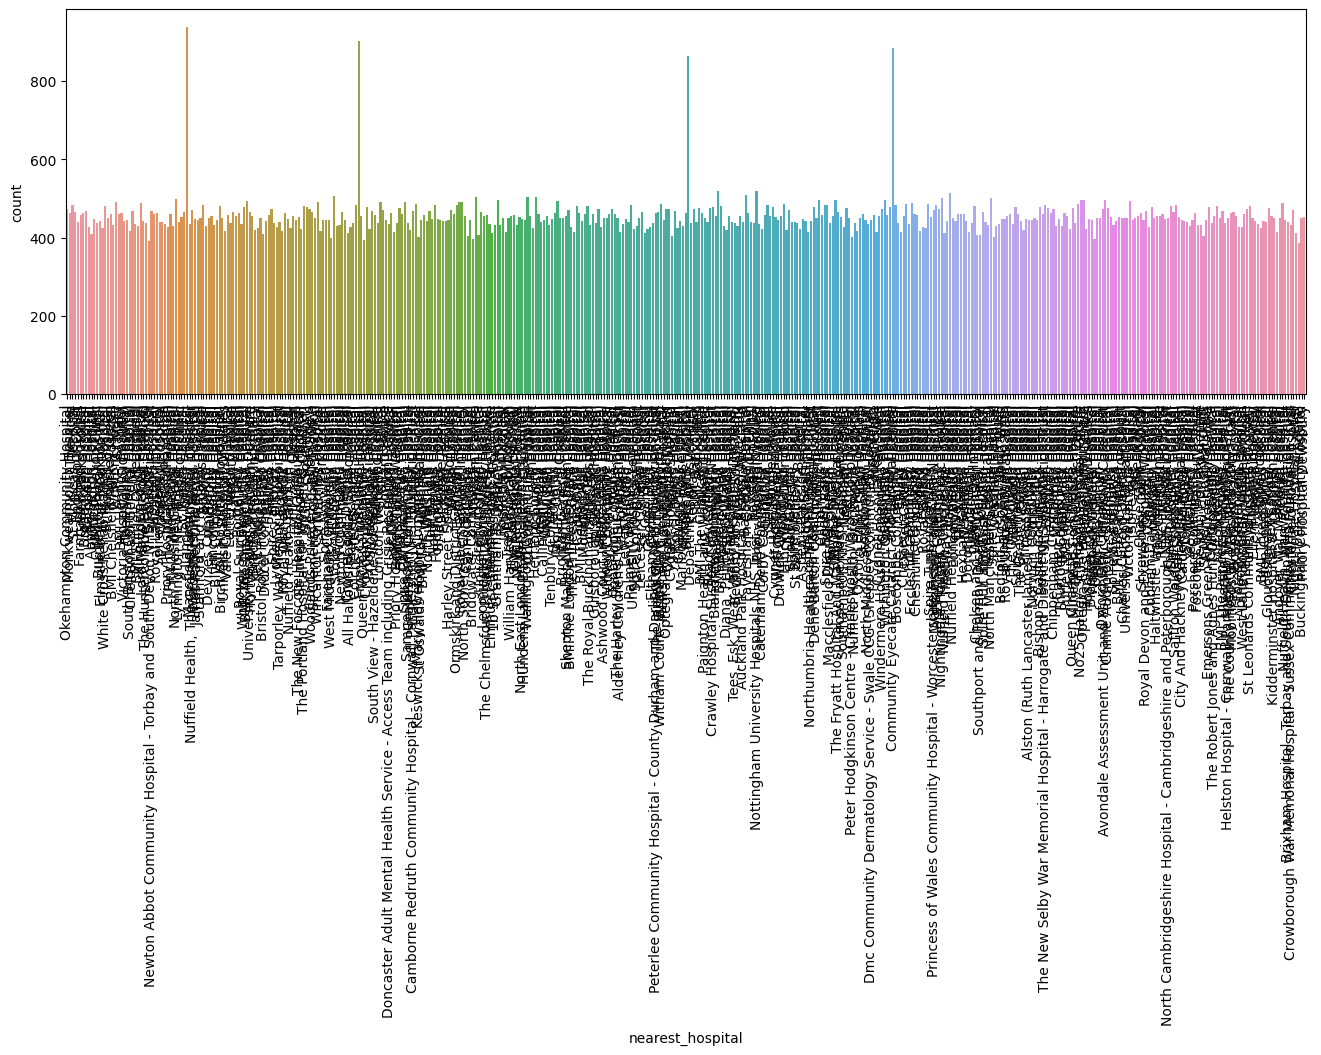

In [128]:
#plot charplot of nearest hospital column 
def plot_charplot(df_accident_cleaned,feature):
    plt.figure(figsize=(16,5))
    sns.countplot(x=feature,data=df_accident_cleaned)
    plt.xticks(rotation=90)
    plt.show()
    
plot_charplot(df_accident_cleaned,'nearest_hospital')

In [129]:
#apply lable encoding to nearest hospital column
def label_encoding(df_accident_cleaned,feature):
    df_accident_cleaned[feature] = df_accident_cleaned[feature].astype('category')
    df_accident_cleaned[feature] = df_accident_cleaned[feature].cat.codes
    return df_accident_cleaned

label_encoding(df_accident_cleaned,'nearest_hospital')


,accident_index,location_easting_osgr,location_northing_osgr,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,Missing_Indicator,week_number,year,month,day,hour,minute,weekend,morning,police_force_Greater Manchester,police_force_Metropolitan Police,police_force_Rare,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_Dual carriageway,road_type_One way street/Slip road,road_type_Roundabout,road_type_Single carriageway,junction_detail_Crossroads,junction_detail_Data missing or out of range,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Data missing or out of range,junction_control_Give way or uncontrolled,junction_control_Stop sign,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Did not happen on intersections,second_road_class_Motorway,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_Data missing or out of range,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Data missing or out of range,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lighting unknown,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Data missing or out of range,light_conditions_Daylight,weather_conditions_Data missing or out of range,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Missing,weather_conditions_Other,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,road_surface_conditions_Data missing or out of range,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Mud,road_surface_conditions_Oil or diesel,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,urban_or_rural_area_Rural,urban_or_rural_area_Urban,did_police_officer_attend_scene_of_accident_Data missing or out of range,did_police_officer_attend_scene_of_accident_No,did_police_officer_attend_scene_of_accident_Yes,trunk_road_flag_Data missing or out of range,trunk_road_flag_Non-trunk,trunk_road_flag_Trunk (Roads managed by Highways England),lsoa_of_accident_location_E_W,lsoa_of_accident_location_number,nearest_hospital
0,1999010SU0945,0.730689,0.161229,0.718661,0.161789,0,1.0,1.0,0.134905,-0.358038,-0.325911,-0.417503,-0.523056,1.697630,-0.855219,0,1.578977,1999,1.528252,1.070608,-0.925259,0.188123,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0.726024,270
1,1999010SU0946,0.735224,0.155335,0.723107,0.155781,0,2.0,1.0,0.167314,-0.358038,-0.325911,-0.417503,-0.5230

In [135]:
#save the cleaned data to csv file
df_accident_cleaned.to_csv('accident_cleaned_2.csv',index=False)